“This notebook handles the collection and basic cleaning of user reviews for Ethiopian banking apps (CBE, BOA, Dashen Bank) using the Google Play Scraper library. Cleaned data is saved for downstream sentiment and experience analysis.”

In [3]:
import pandas as pd

df = pd.read_csv("E:/Tenx/Week 2/data/processed/reviews_cleaned.csv")
df['date'] = pd.to_datetime(df['date'])

df.head()


,review,rating,date,bank,source
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play
1,what is this app problem???,1,2025-06-05,CBE,Google Play
2,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play
4,good,4,2025-06-05,CBE,Google Play


In [4]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())

# Check sample reviews
df.sample(5)


Shape: (1448, 5)

Data types:
 review            object
rating             int64
date      datetime64[ns]
bank              object
source            object
dtype: object

Missing values:
 review    0
rating    0
date      0
bank      0
source    0
dtype: int64


,review,rating,date,bank,source
1437,All in One,5,2025-01-14,Dashen,Google Play
1057,"To be honest, best banking and lifestyle app i...",5,2025-05-12,Dashen,Google Play
100,best app,5,2025-05-21,CBE,Google Play
1400,Excellent and user friendly App. Excellence is...,5,2025-01-16,Dashen,Google Play
940,Please make it functional.,5,2024-07-03,BOA,Google Play


### EDA 

In [12]:
# Count the number of reviews per rating
rating_counts = df['rating'].value_counts().sort_index()  # sort_index() ensures the ratings are in order (1–5)
print(rating_counts)


rating
1    303
2     50
3     76
4     88
5    931
Name: count, dtype: int64


C:\Users\betsi\AppData\Local\Temp\ipykernel_9268\3673787802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


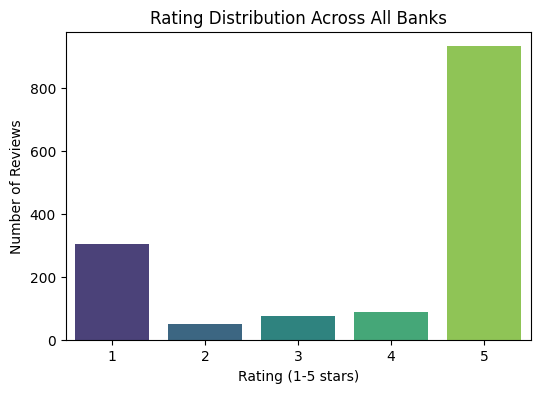

In [ ]:
# Distribution of Ratings ...plotting 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title("Rating Distribution Across All Banks")
plt.xlabel("Rating (1-5 stars)")
plt.ylabel("Number of Reviews")
plt.show()


C:\Users\betsi\AppData\Local\Temp\ipykernel_9268\1948136151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bank', palette='Set2')


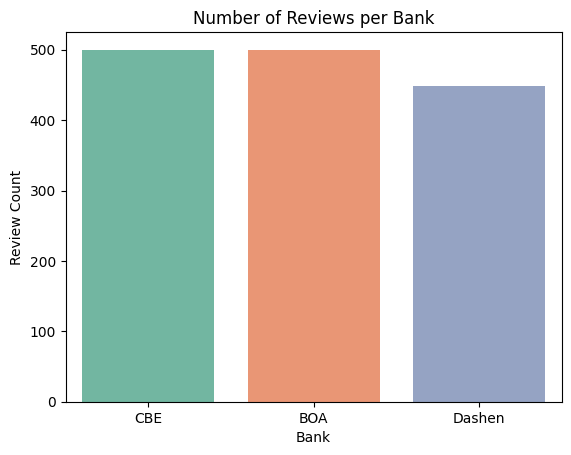

In [6]:
# Review Count by Bank
sns.countplot(data=df, x='bank', palette='Set2')
plt.title("Number of Reviews per Bank")
plt.ylabel("Review Count")
plt.xlabel("Bank")
plt.show()


In [15]:
# Group by date and count reviews
reviews_per_day = df.groupby('date').size()

# Get top 10 dates with the most reviews
top_10_days = reviews_per_day.sort_values(ascending=False).head(10)

# Display the result
print(top_10_days)





date
2025-04-21    112
2025-03-31     56
2025-04-01     43
2025-03-30     26
2025-05-22     23
2025-04-22     22
2025-01-15     21
2025-05-21     20
2025-05-02     20
2025-01-14     16
dtype: int64


C:\Users\betsi\AppData\Local\Temp\ipykernel_9268\3220360288.py:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
e:\Tenx\Week 2\data_analytics_for_fintech_APPs\fintechenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


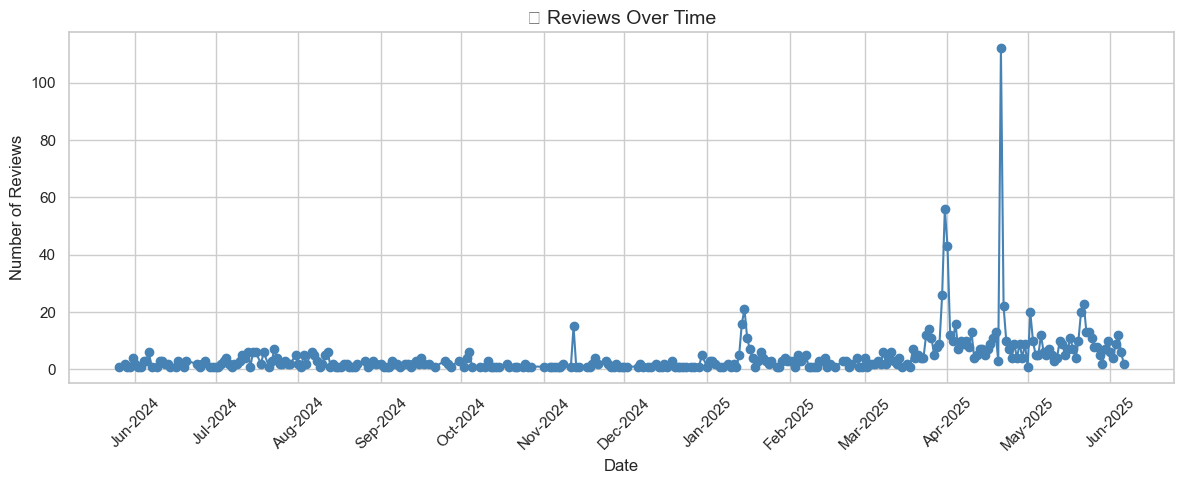

In [ ]:
# Reviews Over Time

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Use Seaborn style
sns.set(style="whitegrid")

# Group by date and count reviews
reviews_per_day = df.groupby('date').size().sort_index()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(reviews_per_day.index, reviews_per_day.values, marker='o', linestyle='-', color='steelblue')

plt.title("📈 Reviews Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [11]:
# Save EDA Summary
import os

# Ensure the processed directory exists
os.makedirs("../data/processed", exist_ok=True)

# Now safe to save
df.describe(include='all').to_csv("../data/processed/reviews_summary.csv")
